# 4.2. Images as Multidimensional Arrays

Module M-227-04: Programming for Data Analytics

Instructor: prof. Dmitry Pavlyuk

## PIL library

Python Imaging Library (PIL) is a free and open-source additional library for the Python programming language that adds support for opening, manipulating, and saving many different image file formats.

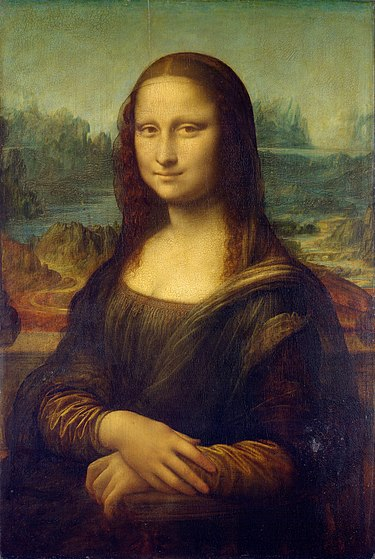

In [2]:
from PIL import Image
lisa_img = Image.open('/content/sample_data/Mona_Lisa.jpg')
lisa_img

## Images as 3D arrays

Images are naturally 3D array - 2D array of pixel values (0-255) for every channel (e.g., RGB - Red, Green, Blue channels)

In [ ]:
import numpy as np
lisa_arr = np.asarray(lisa_img).copy()
lisa_arr.shape

(559, 375, 3)

* First pixel

In [ ]:
lisa_arr[0,0,:]

array([100, 108,  87], dtype=uint8)

## Slicing / Copy

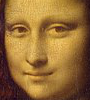

In [ ]:
lisa_face = lisa_arr[100:200,130:220,:]
lisa_face_copy = lisa_face.copy()
Image.fromarray(lisa_face)

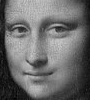

In [ ]:
Image.fromarray(lisa_face[:,:,1])

## Changes

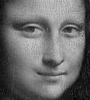

In [ ]:
Image.fromarray(lisa_face[:,::-1,1])

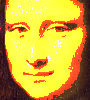

In [ ]:
lisa_face = lisa_arr[100:200,130:220,:]
lisa_face[lisa_face>100] = 255
Image.fromarray(lisa_face)

### Slicing is a view, not a copy!

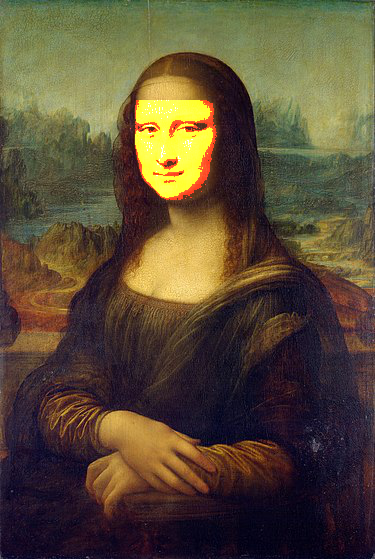

In [ ]:
Image.fromarray(lisa_arr)

### Separating channels

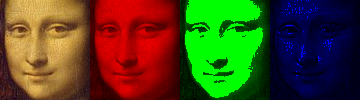

In [ ]:
im_R = lisa_face_copy.copy()
im_R[:, :, [1, 2]] = 0
im_G = lisa_face.copy()
im_G[:, :, [0, 2]] = 0
im_B = lisa_face.copy()
im_B[:, :, [0, 1]] = 0

im_RGB = np.concatenate((lisa_face_copy, im_R, im_G, im_B), axis=1)
Image.fromarray(im_RGB)


### Re-ordering channels (fancy indexing)

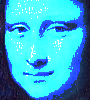

In [ ]:
Image.fromarray(lisa_face[:,:,(2,1,0)])


### Inverting channels

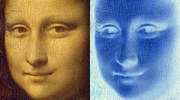

In [ ]:
im_i = 255-lisa_face_copy
Image.fromarray(np.concatenate((lisa_face_copy, im_i), axis=1))


### Reducing colours

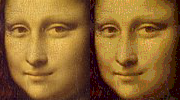

In [ ]:
im_i = lisa_face_copy // 32 * 32
Image.fromarray(np.concatenate((lisa_face_copy, im_i), axis=1))


## Image kernels

In [ ]:
def apply_kernel(arr, kernel):
    res = np.zeros_like(arr)
    for row in range(arr.shape[0]-kernel.shape[0]):
        for col in range(arr.shape[1]-kernel.shape[1]):
            for ch in range(arr.shape[2]):
                res[row+int(kernel.shape[0]/2), col+int(kernel.shape[0]/2), ch] = \
                    (arr[row:row+kernel.shape[0], col:col+kernel.shape[1],ch]*kernel).sum()
    return res

### Blur filter

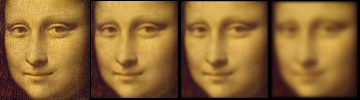

In [ ]:
blur_kernel = np.array([[1,2,1],[2,4,2],[1,2,1]])
blur_kernel = blur_kernel/blur_kernel.sum()

lisa_blured = apply_kernel(lisa_face_copy, blur_kernel)
lisa_blured2x = apply_kernel(lisa_blured, blur_kernel)
Image.fromarray(np.concatenate((lisa_face_copy, lisa_blured, lisa_blured2x), axis=1))


### Outline filter

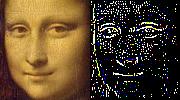

In [ ]:
outline_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])/64
Image.fromarray(np.concatenate((lisa_face_copy, apply_kernel(lisa_face_copy, outline_kernel)), axis=1))

# Thank you